Objetivo: identificar o nível de conhecimento dos processos relacionados à ciência de dados, bem como a resolução de problemas, metodologias e técnicas aplicadas.



Para a resolução do teste é fornecido um conjunto de dados, baseada na fonte aberta: https://archive.ics.uci.edu/ml/datasets/South+German+Credit+%28UPDATE%29
Mas fornecida nesse teste em CSV (credit_risk_dataset.csv) com alterações na base cuja informação das variáveis pode ser obtida no arquivo README.Md.

A proposta do teste é que você desenvolva dois modelos para prever a coluna “credit_risk”, analise e escolha o mais adequado. Caso você se sinta mais à vontade em trabalhar com problemas que a variável resposta é um valor real, você pode escolher prever a coluna “credit_duration”, qualquer uma das abordagens é válida e é necessário escolher e desenvolver apenas uma delas.



O que você deve fazer nesse teste:

- Análise exploratória dos dados e tratamentos se forem necessários;

- Escolher dois tipos de modelo, comparar os resultados e eleger um deles justificando a sua escolha.



Observações:

- É muito importante que você explique o passo a passo, as escolhas feitas, justifique e apresente as conclusões em cada etapa;

- Caso não se sinta à vontade em alguma parte ou não tenha tempo suficiente para concluir o teste, tente apresentar como você pretendia desenvolver essa parte.

- Por fim, é legal apresentar as coisas que você poderia ter feito a mais ou como faria para avançar o estudo.

- Recomendamos fortemente que o projeto seja desenvolvido no Jupyter Notebook para uma melhor visualização das suas justificativas e conclusões juntamente ao código.

Obs.: Código pegado pelo kaggle(https://www.kaggle.com/datasets/kabure/german-credit-data-with-risk), pois o original está com arquivo corrompido

# 1. Análise exploratória

### 1.1 Preparando o Dataset:

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
sns.set(style='ticks', color_codes=True)
sns.set(style='darkgrid')

#Importing the data
df = pd.read_csv("german_credit_data.csv", index_col=0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


### 1.2 Traduzindo o dataset:

In [102]:
df.rename(columns={'Age':'Idade',
                   'Sex':'Sexo',
                   'Job':'Trabalho',
                   'Housing':'Tipo de casa',
                   'Saving accounts':'Economia',
                   'Checking account':'Conta corrente',
                   'Credit amount':'Quantidade de crédito',
                   'Duration':'Duração',
                   'Purpose':'Propósito',
                   'Risk':'Risco'
                  }, inplace=True)
df['Sexo']=df['Sexo'].replace({"male": "Masculino","female":"Feminino"})
df['Tipo de casa']=df['Tipo de casa'].replace({"own": "Própria","rent":"Alugada","free":"Grátis"})
df['Economia']=df['Economia'].replace({"little": "Baixa","moderate":"moderada","rich":"alta"})
df['Conta corrente']=df['Conta corrente'].replace({"little": "Baixa","moderate":"moderada"})
df['Propósito']=df['Propósito'].replace({"business": "negócios",
                                         "car":"carro",
                                         "domestic appliances":"eletrodomésticos",
                                        "education":"educação",
                                        "furniture/equipment":"móveis/equipamentos",
                                        "repairs":"reparos",
                                        "vacation/others":"férias/outros"})
df['Risco']=df['Risco'].replace({"good": 0,"bad":1})
df

,Idade,Sexo,Trabalho,Tipo de casa,Economia,Conta corrente,Quantidade de crédito,Duração,Propósito,Risco
0,67,Masculino,2,Própria,NaN,Baixa,1169,6,radio/TV,0
1,22,Feminino,2,Própria,Baixa,moderada,5951,48,radio/TV,1
2,49,Masculino,1,Própria,Baixa,NaN,2096,12,educação,0
3,45,Masculino,2,Grátis,Baixa,Baixa,7882,42,móveis/equipamentos,0
4,53,Masculino,2,Grátis,Baixa,Baixa,4870,24,carro,1
...,...,...,...,...,...,...,...,...,...,...
995,31,Feminino,1,Própria,Baixa,NaN,1736,12,móveis/equipamentos,0
996,40,Masculino,3,Própria,Baixa,Baixa,3857,30,carro,0
997,38,Masculino,2,Própria,Baixa,NaN,804,12,radio/TV,0
998,23,Masculino,2,Grátis,Baixa,Baixa,1845,45,radio/TV,1


### 1.3 Resumo estatístico:

In [103]:
df.describe()

,Idade,Trabalho,Quantidade de crédito,Duração,Risco
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000,0.300000
std,11.375469,0.653614,2822.736876,12.058814,0.458487
min,19.000000,0.000000,250.000000,4.000000,0.000000
25%,27.000000,2.000000,1365.500000,12.000000,0.000000
50%,33.000000,2.000000,2319.500000,18.000000,0.000000
75%,42.000000,2.000000,3972.250000,24.000000,1.000000
max,75.000000,3.000000,18424.000000,72.000000,1.000000


### 1.4 Correlação por mapa de calor:

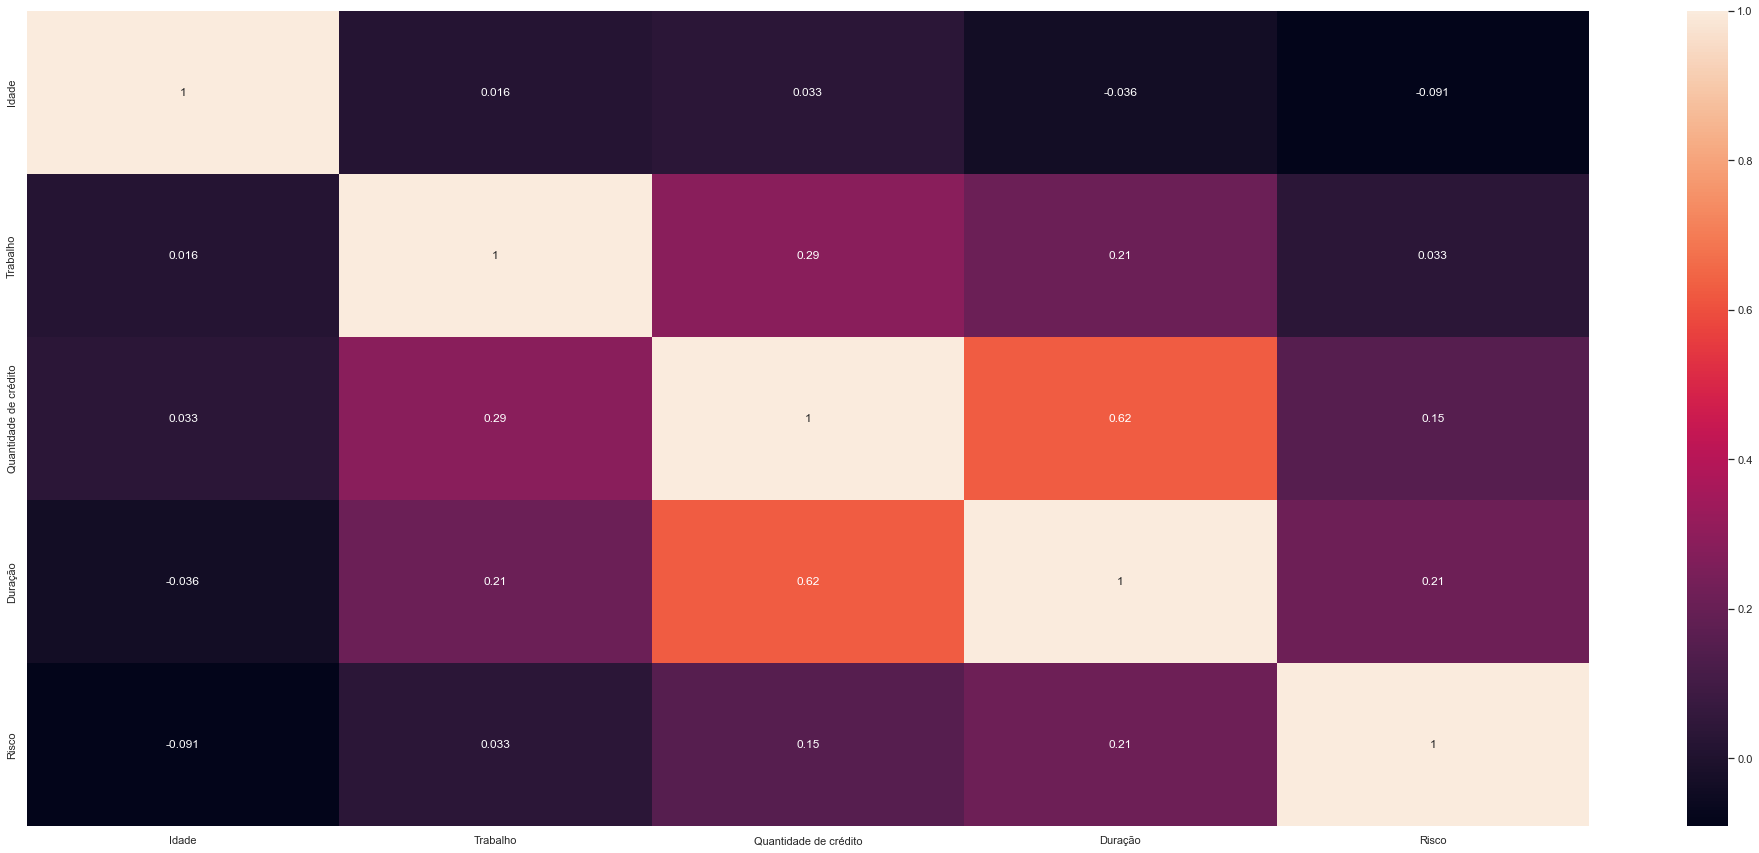

In [104]:
correlacao = df.corr()
plt.figure(figsize = (35,15))
mapa_calor = sns.heatmap(correlacao, annot=True)

### 1.4 Visualizando os dados:

#### 1.4.1 Distribuição de variável de destino:

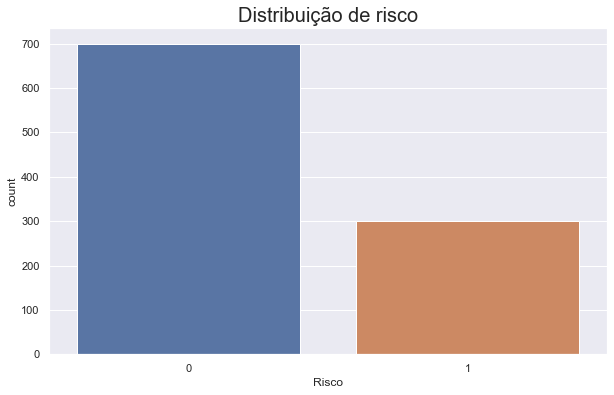

In [105]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Risco")
plt.title("Distribuição de risco", fontsize=20)
plt.show()

#### 1.4.2 Gráfico de pares das variáveis numéricas:

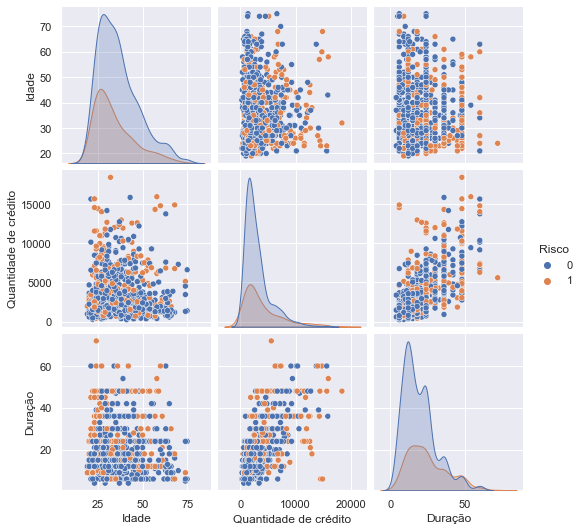

In [106]:
num_cat_risk = ['Idade', 'Quantidade de crédito', 'Duração', 'Risco']
sns.pairplot(df[num_cat_risk], hue="Risco")
plt.show()

### 1.5.1 Distribuição da idade:

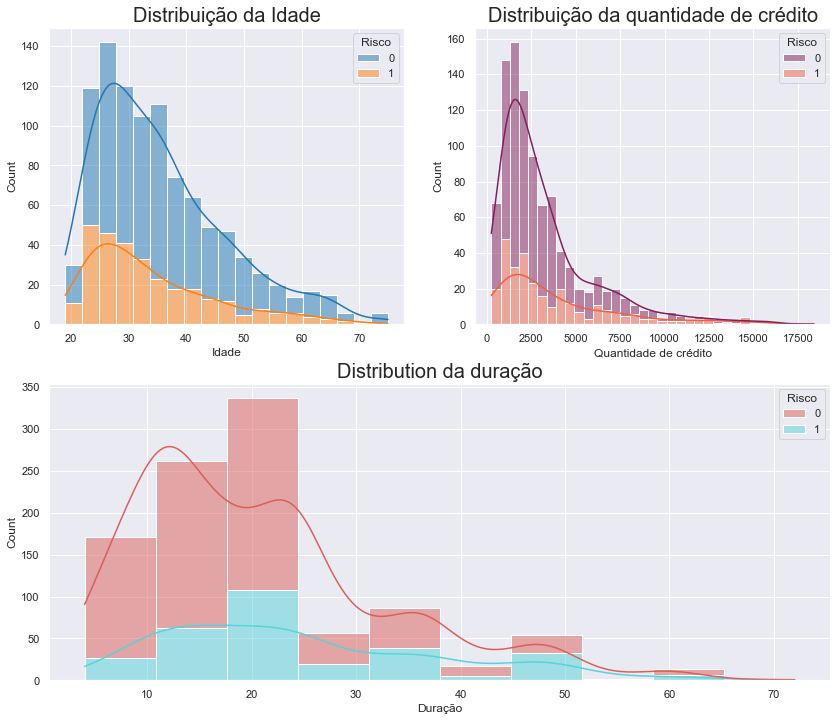

In [107]:
plt.figure(figsize=(14, 12))

plt.subplot(221)
ax1 = sns.histplot(data=df, x='Idade', hue='Risco', multiple='stack', palette='tab10', kde=True)
ax1.set_title("Distribuição da Idade", fontsize=20)

plt.subplot(222)
ax2 = sns.histplot(data=df, x='Quantidade de crédito', hue='Risco', multiple='stack', palette='rocket', kde=True)
ax2.set_title("Distribuição da quantidade de crédito", fontsize=20)

plt.subplot(212)
ax3 = sns.histplot(data=df, x='Duração', hue='Risco', multiple='stack', palette='hls', kde=True, bins=10)
ax3.set_title("Distribution da duração", fontsize=20)

plt.show()

Todos os gráficos têm uma inclinação positiva indicando que a média é maior que a mediana

A faixetária dos 20 solicita mais empréstimo

Os candidatos são menos propensos a solicitar um empréstimo de crédito alto

Mais empréstimos foram pagos cerca de 20 meses após serem emitidos

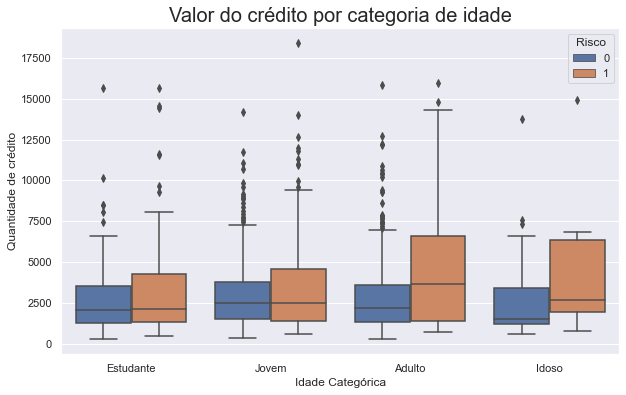

In [108]:
interval = (18, 25, 35, 60, 120)

cats = ['Estudante', 'Jovem', 'Adulto', 'Idoso']
df["Idade Categórica"] = pd.cut(df['Idade'], interval, labels=cats)

plt.figure(figsize=(10, 6))
plt.title("Valor do crédito por categoria de idade", fontsize=20)
sns.boxplot(data=df, x='Idade Categórica', y='Quantidade de crédito', hue='Risco')
plt.show()

Mais de 50% dos solicitantes com valores de crédito abaixo de 5.000 são classificados como bons

Adultos com crédito de empréstimo superior a 5.000 são mais propensos a classificar como ruim

Adultos e idosos possuem maior tendência a serem ruins

Estudantes e jovens candidatos são mais propensos a solicitar empréstimos com um valor de crédito inferior a 5.000


### 1.5.2 Distribuição das moradias:

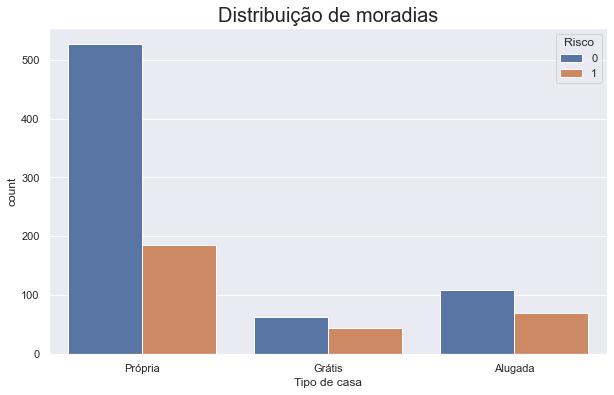

In [109]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Tipo de casa', hue='Risco')
plt.title("Distribuição de moradias", fontsize=20)
plt.show()

Mais que a metade dos candidatos tem casa própria

O risco é menor de quem possui casa própria

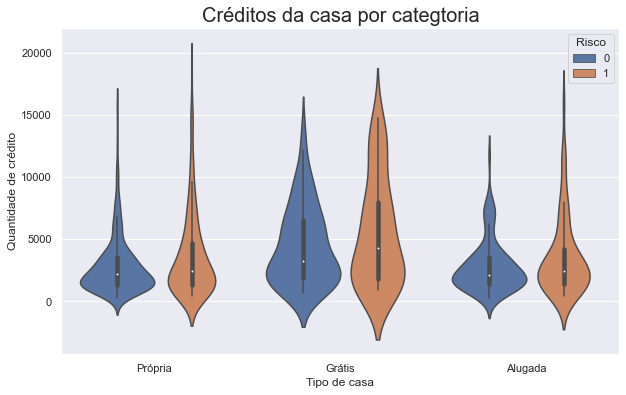

In [110]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Tipo de casa', y='Quantidade de crédito', hue='Risco')
plt.title("Créditos da casa por categtoria", fontsize=20)
plt.show()

### 1.5.3 Distribuição por gênero:

Text(0.5, 0, '')

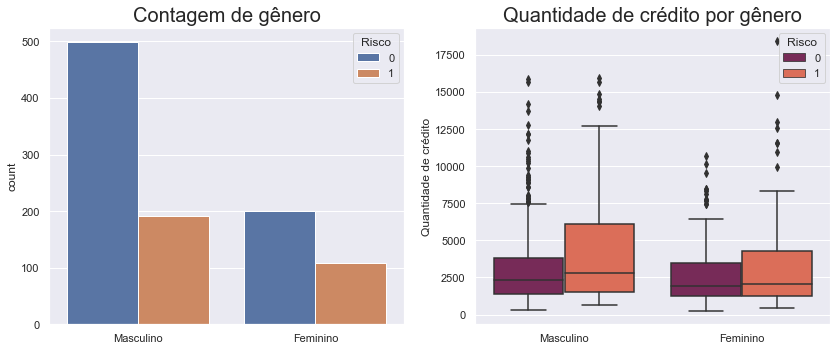

In [111]:
plt.figure(figsize=(14, 12))
plt.subplot(221)
ax1 = sns.countplot(data=df, x='Sexo', hue='Risco')
ax1.set_title("Contagem de gênero", fontsize=20)
ax1.set_xlabel("")

plt.subplot(222)
ax2 = sns.boxplot(data=df, x='Sexo', y='Quantidade de crédito', palette='rocket', hue='Risco')
ax2.set_title("Quantidade de crédito por gênero", fontsize=20)
ax2.set_xlabel("")

### 1.5.3 Distribuição da duração:

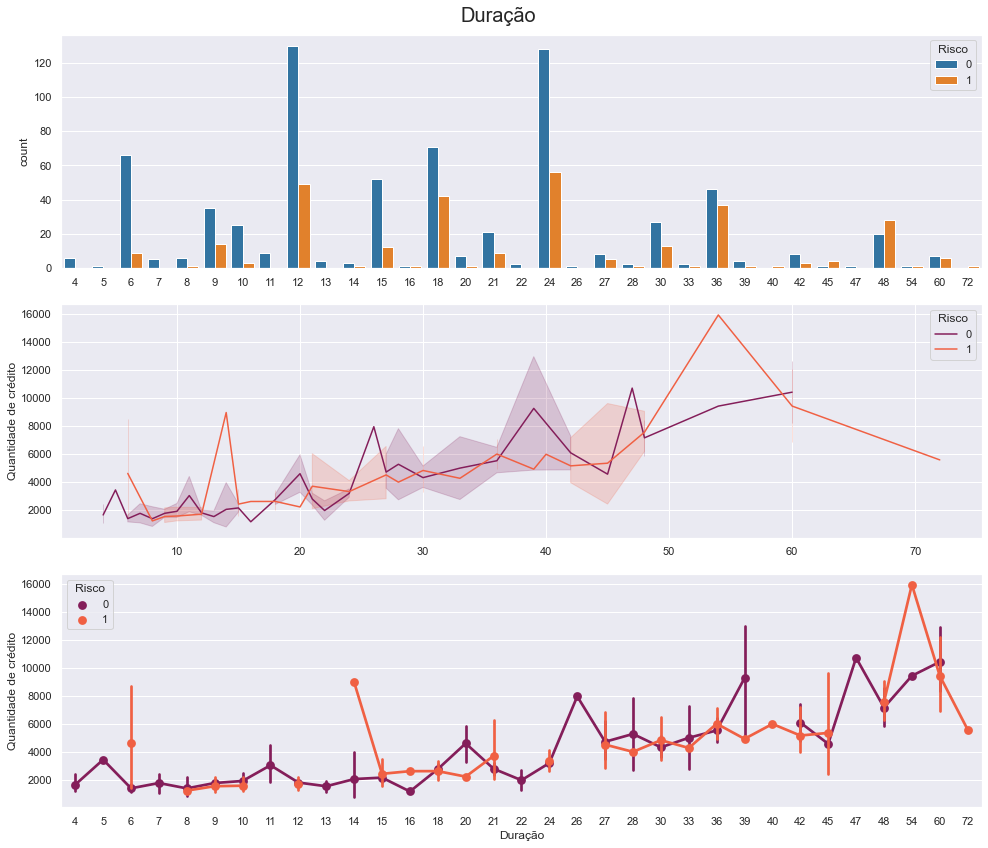

In [112]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12))
fig.suptitle("Duração", fontsize=20)
sns.countplot(data=df, x='Duração', hue='Risco', palette='tab10', ax=ax1)
ax1.set_xlabel("")

sns.pointplot(data=df, x='Duração', y='Quantidade de crédito', hue='Risco', palette='rocket', ax=ax3)
fig.tight_layout()

sns.lineplot(data=df, x='Duração', y='Quantidade de crédito', hue='Risco', palette='rocket', ax=ax2)
ax2.set_xlabel("")

plt.show()

# 2. Modelos de IA

## 2.1 Ajustando os dados

In [113]:
df

,Idade,Sexo,Trabalho,Tipo de casa,Economia,Conta corrente,Quantidade de crédito,Duração,Propósito,Risco,Idade Categórica
0,67,Masculino,2,Própria,NaN,Baixa,1169,6,radio/TV,0,Idoso
1,22,Feminino,2,Própria,Baixa,moderada,5951,48,radio/TV,1,Estudante
2,49,Masculino,1,Própria,Baixa,NaN,2096,12,educação,0,Adulto
3,45,Masculino,2,Grátis,Baixa,Baixa,7882,42,móveis/equipamentos,0,Adulto
4,53,Masculino,2,Grátis,Baixa,Baixa,4870,24,carro,1,Adulto
...,...,...,...,...,...,...,...,...,...,...,...
995,31,Feminino,1,Própria,Baixa,NaN,1736,12,móveis/equipamentos,0,Jovem
996,40,Masculino,3,Própria,Baixa,Baixa,3857,30,carro,0,Adulto
997,38,Masculino,2,Própria,Baixa,NaN,804,12,radio/TV,0,Adulto
998,23,Masculino,2,Grátis,Baixa,Baixa,1845,45,radio/TV,1,Estudante


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Idade                  1000 non-null   int64   
 1   Sexo                   1000 non-null   object  
 2   Trabalho               1000 non-null   int64   
 3   Tipo de casa           1000 non-null   object  
 4   Economia               817 non-null    object  
 5   Conta corrente         606 non-null    object  
 6   Quantidade de crédito  1000 non-null   int64   
 7   Duração                1000 non-null   int64   
 8   Propósito              1000 non-null   object  
 9   Risco                  1000 non-null   int64   
 10  Idade Categórica       1000 non-null   category
dtypes: category(1), int64(5), object(5)
memory usage: 119.4+ KB


As variáveis obj: Sexo, Tipo de casa, Economia, Conta corrente, Propósito

Serão transformadas em númericas

In [115]:
#Contagem de valores nan
df.isnull().sum()
#Se eu eliminar os valores nulos vou perder metade do meu dataset
#Descartar a coluna conta corretne
#Na coluna economia inputar a moda

Idade                      0
Sexo                       0
Trabalho                   0
Tipo de casa               0
Economia                 183
Conta corrente           394
Quantidade de crédito      0
Duração                    0
Propósito                  0
Risco                      0
Idade Categórica           0
dtype: int64

In [116]:
#Valores únicos de cada variável obj:
print("Sexo: ",df.Sexo.unique())
print("Tipo de casa: ",df['Tipo de casa'].unique())
print("Economia: ",df['Economia'].unique())
print("Conta corrente: ",df['Conta corrente'].unique())

Sexo:  ['Masculino' 'Feminino']
Tipo de casa:  ['Própria' 'Grátis' 'Alugada']
Economia:  [nan 'Baixa' 'quite rich' 'alta' 'moderada']
Conta corrente:  ['Baixa' 'moderada' nan 'rich']


In [117]:
#preenchendo valores faltantes da economia com a moda
df.Economia.value_counts()
df.Economia = df.Economia.fillna('Baixa')

In [118]:
df['Sexo'] = df['Sexo'].map({'Masculino':1, 'Feminino':0})

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Idade                  1000 non-null   int64   
 1   Sexo                   1000 non-null   int64   
 2   Trabalho               1000 non-null   int64   
 3   Tipo de casa           1000 non-null   object  
 4   Economia               1000 non-null   object  
 5   Conta corrente         606 non-null    object  
 6   Quantidade de crédito  1000 non-null   int64   
 7   Duração                1000 non-null   int64   
 8   Propósito              1000 non-null   object  
 9   Risco                  1000 non-null   int64   
 10  Idade Categórica       1000 non-null   category
dtypes: category(1), int64(6), object(4)
memory usage: 119.4+ KB


In [129]:
#Base de dados pequenas, mais fácil usar o LabelEncoder para o modelo performar melhor do que o onehottingencolder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Economia'] = labelencoder.fit_transform(df['Economia'])
df['Propósito'] = labelencoder.fit_transform(df['Propósito'])
df['Tipo de casa'] = labelencoder.fit_transform(df['Tipo de casa'])
df

,Idade,Sexo,Trabalho,Tipo de casa,Economia,Conta corrente,Quantidade de crédito,Duração,Propósito,Risco,Idade Categórica
0,67,1,2,2,0,Baixa,1169,6,6,0,Idoso
1,22,0,2,2,0,moderada,5951,48,6,1,Estudante
2,49,1,1,2,0,NaN,2096,12,1,0,Adulto
3,45,1,2,1,0,Baixa,7882,42,4,0,Adulto
4,53,1,2,1,0,Baixa,4870,24,0,1,Adulto
...,...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,2,0,NaN,1736,12,4,0,Jovem
996,40,1,3,2,0,Baixa,3857,30,0,0,Adulto
997,38,1,2,2,0,NaN,804,12,6,0,Adulto
998,23,1,2,1,0,Baixa,1845,45,6,1,Estudante


In [143]:
#Já possui a coluna idades, retirada de idade categórica e retirada da coluna Conta correte 
#por possuir vários valores nulos
X = df.drop(columns=["Risco","Conta corrente","Idade Categórica"])
y = df['Risco']

## 2.2 Implementando os modelos

In [145]:
! Pip install sklearn
from sklearn.tree import DecisionTreeClassifier
# DecisionTreeClassifier -  Utilizado para a criação do modelo de ML
from sklearn.model_selection import train_test_split
# para fazer a separação de uma parte dos dados para treino e outra para teste 
from sklearn.metrics import accuracy_score
# Utilizado para ver a precisão do modelo 
from sklearn.metrics import plot_confusion_matrix
# Utilizado para gerar o grafico de uma matriz de confusão do modelo 
from sklearn.model_selection import GridSearchCV
# Utilizado para encontrar os melhores valores para os hiperparâmetros
from sklearn.model_selection import cross_validate
# Utilizado para fazer validação cruzada do modelo 
from sklearn.model_selection import GroupKFold
# Utilizado para separar por grupos na hora de treinar o modelo
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 2)

# Árvore de decisão

In [150]:
cv=GroupKFold(n_splits=10)
#criado uma divisão com 10 grupos nos dados 
modelo_arvore = DecisionTreeClassifier(random_state = 2)
# criado um modelo de arvore de decisão
resultados=cross_validate(modelo_arvore,X,y,cv=cv,groups=df['Duração'])
# Criado a validação cruzada utilizando o modelo o x e o y do dataset todo e definido a coluna idade para ser o grupo 
media =resultados['test_score'].mean()
desvio_padrao=resultados['test_score'].std()
print(f'accuracy = [{((media - 2* desvio_padrao)*100).round(2)} , {((media+2*desvio_padrao)*100).round(2)}]')
# Encontrado o periodo em que se encontra a precisão do modelo

accuracy = [54.17 , 77.69]


In [152]:
espaco_de_parametros = {"max_depth" : range(1,8,1),
                        "min_samples_split" : range(2,8,1),
                        "min_samples_leaf" : range(2,8,1),
                        "criterion" : ["gini", "entropy"],
                        "max_leaf_nodes":range(2,8,1)}
cv=GroupKFold(n_splits=5)
busca = GridSearchCV(DecisionTreeClassifier(random_state = 2),
                    espaco_de_parametros,
                    cv = cv)
busca.fit(X, y, groups = df['Duração'])
resultados = pd.DataFrame(busca.cv_results_)
busca.best_estimator_
#criado valores para se testar em cada parametro
#escolhido quantos grupos vão ser utilizados 
#criado o gridsearch
#realizado o treinamento com os valores para cada parametro
#retornado o melhor modelo encontrado dentro desses parametros

DecisionTreeClassifier(criterion='entropy', max_depth=1, max_leaf_nodes=2,
                       min_samples_leaf=2, random_state=2)

In [153]:
busca.best_params_

{'criterion': 'entropy',
 'max_depth': 1,
 'max_leaf_nodes': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [158]:
modelo_ajustado = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=1, max_features=None, max_leaf_nodes=2,
                       min_impurity_decrease=0.0,min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')
modelo_ajustado.fit(X_train, y_train)
# Treinado um novo modelo de ML com a arvore de decisão com os parametros encontrados como adequados

DecisionTreeClassifier(criterion='entropy', max_depth=1, max_leaf_nodes=2,
                       min_samples_leaf=2)

In [159]:
accuracy =(modelo_ajustado.score(X_test,y_test)*100).round(2)
print(accuracy.round(2), "%")

68.0 %


# Floresta aleatória

In [165]:
clf = RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [166]:
modelo_floresta = RandomForestClassifier(random_state = 2)
modelo_floresta.fit(X_train, y_train)
accuracy =(modelo_floresta.score(X_test,y_test)*100).round(2)
print(accuracy.round(2), "%")

69.5 %


In [168]:
cv=GroupKFold(n_splits=10)
#criado uma divisão com 10 grupos nos dados 
modelo_ajustado_floresta = RandomForestClassifier(random_state = 2)
# criado um modelo de arvore de decisão
resultados=cross_validate(modelo_ajustado_floresta,X,y,cv=cv,groups=df['Duração'])
# Criado a validação cruzada utilizando o modelo o x e o y do dataset todo e definido a coluna idade para ser o grupo 
media =resultados['test_score'].mean()
desvio_padrao=resultados['test_score'].std()
print(f'accuracy = [{((media - 2* desvio_padrao)*100).round(2)} , {((media+2*desvio_padrao)*100).round(2)}]')
# Encontrado o periodo em que se encontra a precisão do modelo

accuracy = [51.74 , 87.79]


In [169]:
# create random grid
from sklearn.model_selection import RandomizedSearchCV
espaco_de_parametros_floresta = {
 'n_estimators': range(1,55,1),
 'max_features': range(2,55,1),
 'max_depth': range(2,55,1)
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(RandomForestClassifier(random_state = 2), espaco_de_parametros_floresta)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

{'n_estimators': 24, 'max_features': 4, 'max_depth': 46}


C:\Users\marco\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\marco\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\marco\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\marco\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\marco\anaconda3\lib\site-packages\jo

In [171]:
modelo_ajustado_floresta = RandomForestClassifier(n_estimators=24,
                                    max_features=4,
                                    max_depth=46,random_state = 2)
modelo_ajustado_floresta.fit (X_train, y_train)

RandomForestClassifier(max_depth=46, max_features=4, n_estimators=24,
                       random_state=2)

In [172]:
accuracy =(modelo_ajustado_floresta.score(X_test, y_test)*100).round(2)
print(accuracy.round(2), "%")

64.5 %


- É muito importante que você explique o passo a passo, as escolhas feitas, justifique e apresente as conclusões em cada etapa;

- Caso não se sinta à vontade em alguma parte ou não tenha tempo suficiente para concluir o teste, tente apresentar como você pretendia desenvolver essa parte.

- Por fim, é legal apresentar as coisas que você poderia ter feito a mais ou como faria para avançar o estudo.

Escolhi os dois modelos baseados em árvore, pois eles tendem a performar bem com poucos parâmetros ou necessidades de mudança, diante de funcionarem a base da entropia
Caso tivesse mais tempo iria implementar o modelo de regressão logística e o modelo SVM que busca a linha de separação entre duas classes.
Iria comparar os modelos com a matriz de confusão, avaliar eles pela curva AUC e a curva ROC, calcular o nível de overfitting,
A base de dados de risco está desbalanceada, seria ideal usar a opção de aplicar SMOTE(Synthetic Minority Over-sampling Technique) para equilibrar os dados e depois criar um modelo mais eficiente